In [148]:
import random
import matplotlib.pyplot as plt
from collections import Counter

In [149]:
# compares proposal against solution and returns feedback as tuple
# does not work properly for duplicate entries
def getFeedback(proposal, solution):
    black = 0
    white = 0
    for i in range(4):
        if solution[i] == proposal[i]:
            black += 1
        if proposal[i] in solution:
            white += 1
    return black, white - black

In [150]:
# checks if proposal complys with the previous ones, given the game history
# a proposal cannot be the correct solution if:
# - it has not as many positions in common as there are black pins for that turn
# - it has fewer colors in common than white pins
def sensible(newProposal, hist):
    for oldProposal, feedback in hist:
        samePos, sameColor = getFeedback(newProposal, oldProposal)
        if samePos != feedback[0]:
            return False
        if sameColor != feedback[1]:
            return False
    return True

In [151]:
# game history as list of turns
# one turn: (proposal, feedback)
history = []

In [152]:
solution = random.sample([0,1,2,3,4,5], 4)
solution

[3, 4, 0, 2]

In [143]:
turnCounts_algo = []
for i in range(1000):
    foundSolution = False
    counter = 0
    history = []
    while(not foundSolution):
        proposal = random.sample([0,1,2,3,4,5], 4)
        if sensible(proposal, history):
            counter += 1
            black, white = getFeedback(proposal, solution)
            history.append([proposal, (black, white)])
            if black == 4:
                foundSolution = True
    turnCounts_algo.append(counter)
#print(sum(turnCounts_algo)/1000)

In [173]:
values = list(Counter(turnCounts_algo).values())
keys = list(Counter(turnCounts_algo).keys())

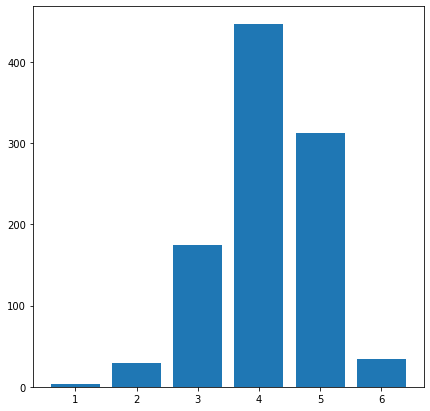

In [185]:
plt.rcParams['figure.figsize'] = 7, 7
fig = plt.bar(keys, values)
plt.savefig("mastermind algorithm")

In [161]:
turnCounts_random = []
for i in range(1000):
    foundSolution = False
    counter = 0
    while(not foundSolution):
        proposal = random.sample([0,1,2,3,4,5], 4)
        counter += 1
        black, white = getFeedback(proposal, solution)
        if black == 4:
            foundSolution = True
    turnCounts_random.append(counter)
print(sum(turnCounts_random)/1000)    

336.859


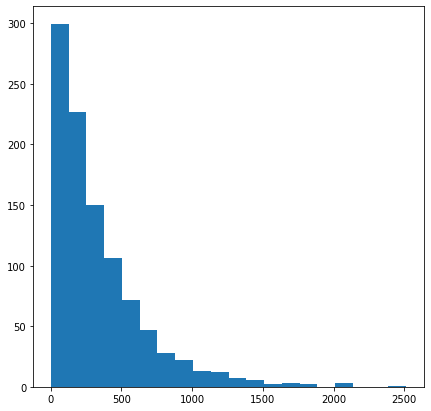

In [187]:
plt.hist(turnCounts_random, bins = 20)
plt.savefig("mastermind random")